# Single-variable nonlinear program

In [20]:
import numpy as np
import pyomo.environ as pe
import pyomo_helpers as helpers

We'll look at two types of solvers we can use to for nonlinear programs.  The first one, called IPOPT, you can think of like GRG Nonlinear in Excel.  You can install this solver by running the next cell (uncomment it first!).

In [1]:
# Mac:  open Terminal and run "conda activate <environment>".  Then run command below.
# Windows:  open Anaconda Prompt app and run the command below.
# conda install -c conda-forge ipopt

Let's suppose we have a smooth, nonlinear function of one variable defined on the interval [-1, 1].  Because the domain is bounded, there are two local minima and two local maximia.

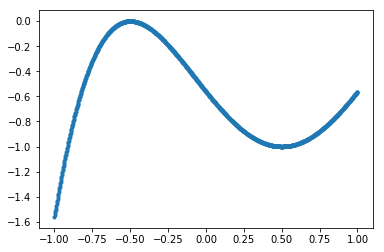

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def nonlinear_function(x):
    return -((x - 0.5)**2 - 1)**2

x = np.linspace(-1, 1, 1000)
y = [nonlinear_function(xi) for xi in x]
_ = plt.scatter(x, y, marker='.')

We would like to find the point (-1, -1.5625) as the global minimum on this domain, but notice there is another local minimum at `x=0.5`.  Which one will the solver find?

Let's create the Pyomo model.  It's a super simple model with no data, so we can just use `ConcreteModel` type.

In [24]:
model = pe.ConcreteModel()

x_index = [1]
model.x = pe.Var(x_index, domain=pe.Reals, bounds=(-1, 1))

def nonlinear_function_rule(model):
    return -((model.x[1] - 0.5)**2 - 1)**2
model.obj = pe.Objective(rule=nonlinear_function_rule)

Solve using `ipopt` with a single initial guess for `x` (the default).

In [39]:
instance, obj1, solution1 = helpers.solve(model, solver='ipopt')
x1 = solution1['x'][0]
print('optimal x={}, y={}'.format(x1, obj1))

    model; returning a clone of the current model instance.

Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 1
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.05348968505859375
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

optimal x=0.4999999991633004, y=-1.0


We can also set the solver to `multistart` to run `ipopt` with multiple initial guesses for `x` (just like in Solver).

In [40]:
# Run ipopt with multiple starts
instance, obj2, solution2 = helpers.solve(model, solver='multistart')
x2 = solution2['x'][0]
print('optimal x={}, y={}'.format(x2, obj2))

    model; returning a clone of the current model instance.

Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 1
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04687309265136719
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

optimal x=-1.0, y=-1.5625


Plot the results.  You can comment out the first two lines if you don't have `seaborn` installed.

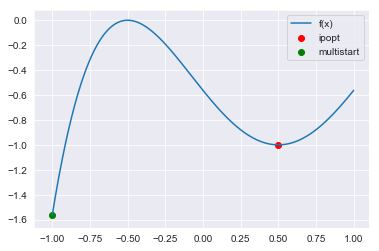

In [51]:
import seaborn as sns
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax = plt.plot(x, y, label='f(x)')
ax = plt.scatter(x=x1, y=obj1, c='r', label='ipopt')
ax = plt.scatter(x=x2, y=obj2, c='g', label='multistart')
ax = plt.legend()